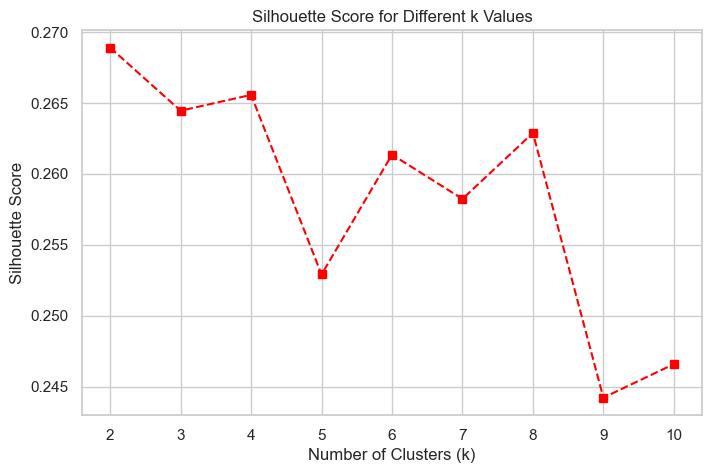

In [34]:
from sklearn.metrics import silhouette_score

# Try different k values and compute silhouette scores
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(pca_reduced_df)
    score = silhouette_score(pca_reduced_df, labels)
    silhouette_scores.append(score)

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='s', linestyle='--', color='red')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different k Values')
plt.grid(True)
plt.show()


In [37]:
# Apply K-Means with best k
best_k = 4  # Based on Elbow + Silhouette results
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(pca_reduced_df)

# Add cluster labels to dataset
pca_reduced_df.loc[:, 'Cluster'] = cluster_labels
df.loc[:, 'Cluster'] = cluster_labels

# Display cluster counts
print(df['Cluster'].value_counts())


Cluster
1    3027
0    2362
2    2181
3    1361
Name: count, dtype: int64
